<a href="https://colab.research.google.com/github/senu2000/Polynomial-Regression-model/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Dataset

In [13]:
import numpy as np

np.random.seed(0)
x = 1 + 2 * np.random.normal(0, 1, 1000)
y = x + 1.5 * (x ** 2) + 0.8 * (x ** 3) + np.random.normal(0, 3, 1000)

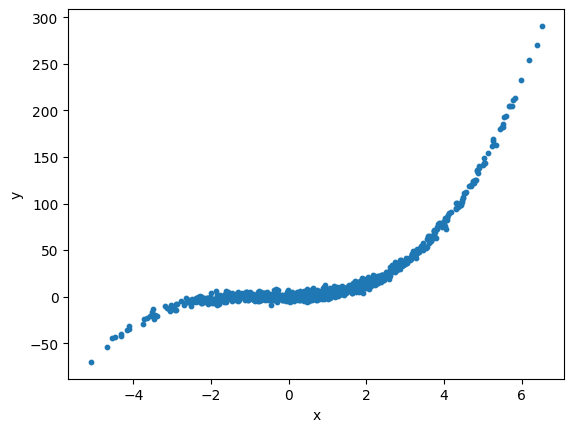

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x = x[:, np.newaxis]
y = y[:, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

Train Simple Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print('Degree 1 - Training error:', model.score(x_train, y_train))
print('Degree 1 - Validation error:', model.score(x_val, y_val))

Degree 1 - Training error: 0.6112766542009314
Degree 1 - Validation error: 0.578092525888924


# Train Polynomial Regression model

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly_regr = PolynomialFeatures(degree=2)
x_poly2 = poly_regr.fit_transform(x_train)

model2 = LinearRegression()
model2.fit(x_poly2, y_train)

x_poly_val2 = poly_regr.fit_transform(x_val)

print('Degree 2 - Training error:', model2.score(x_poly2, y_train))
print('Degree 2 - Validation error:', model2.score(x_poly_val2, y_val))

Degree 2 - Training error: 0.8901821639950546
Degree 2 - Validation error: 0.8567139925783426


In [22]:
poly_regr = PolynomialFeatures(degree=3)
x_poly3 = poly_regr.fit_transform(x_train)

model3 = LinearRegression()
model3.fit(x_poly3, y_train)

x_poly_val3 = poly_regr.fit_transform(x_val)

print('Degree 3 - Training error:', model3.score(x_poly3, y_train))
print('Degree 3 - Validation error:', model3.score(x_poly_val3, y_val))

Degree 3 - Training error: 0.9941068693023871
Degree 3 - Validation error: 0.9941018868235563


In [19]:
poly_regr = PolynomialFeatures(degree=20)
x_poly20 = poly_regr.fit_transform(x_train)

model20 = LinearRegression()
model20.fit(x_poly20, y_train)

print('Degree 20 - Training error:', model20.score(x_poly20, y_train))
print('Degree 20 - Validation error:', model20.score(poly_regr.fit_transform(x_val), y_val))


Degree 20 - Training error: 0.9941895841703763
Degree 20 - Validation error: 0.6575018123469116


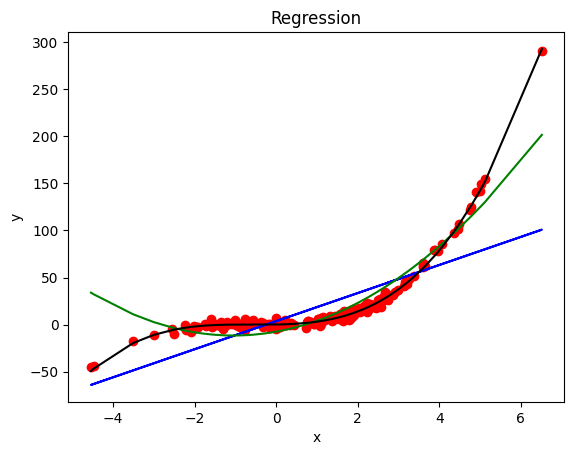

In [26]:
plt.scatter(x_val, y_val, color='red')
plt.plot(x_val, model.predict(x_val), color='blue')

x2,y2 = zip(*sorted(zip(x_val, model2.predict(x_poly_val2)), key=lambda x: x[0]))
plt.plot(x2,y2, color='green')

x3,y3 = zip(*sorted(zip(x_val, model3.predict(x_poly_val3)), key=lambda x: x[0]))
plt.plot(x3,y3, color='black')

plt.title('Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Evaluate the final performance

In [27]:
poly_regr = PolynomialFeatures(degree=3)
x_poly_test3 = poly_regr.fit_transform(x_test)

model3.score(x_poly_test3, y_test)

0.9943846230082006